Exception in thread Thread-8:
Traceback (most recent call last):
  File "/Users/md/opt/anaconda3/lib/python3.9/threading.py", line 973, in _bootstrap_inner
    self.run()
  File "/Users/md/opt/anaconda3/lib/python3.9/threading.py", line 910, in run
    self._target(*self._args, **self._kwargs)
  File "/var/folders/4d/8tkcz58x0md0_v7fj12j6ht80000gn/T/ipykernel_10546/1053642394.py", line 286, in plot
  File "/Users/md/opt/anaconda3/lib/python3.9/tkinter/__init__.py", line 2354, in __getattr__
    return getattr(self.tk, attr)
AttributeError: '_tkinter.tkapp' object has no attribute 'loader_label'


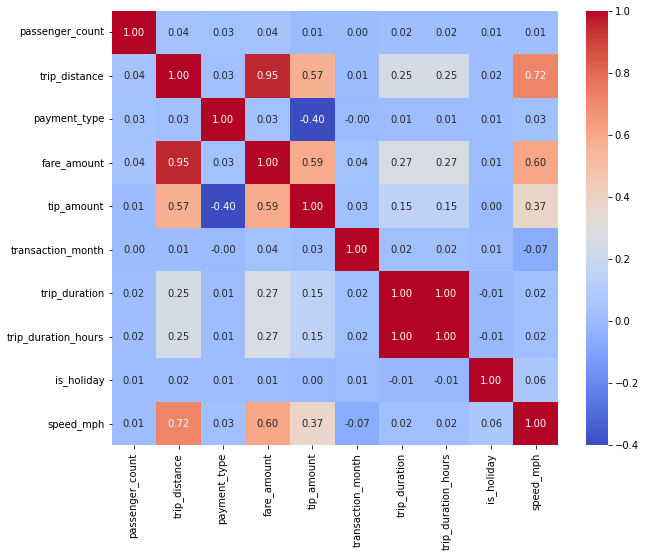

In [1]:
import tkinter as tk
from tkinter import ttk
from tkinter import scrolledtext
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg
import numpy as np
import threading

# Load the sampled dataset
df = pd.read_parquet('sampled_taxi_dataset_v.1.parquet')

class EDAGUI(tk.Tk):
    def __init__(self):
        super().__init__()

        self.title("NYC Taxi Trip EDA")
        self.geometry("1200x800")

        # Create a main frame
        self.main_frame = tk.Frame(self)
        self.main_frame.pack(fill=tk.BOTH, expand=1)

        # Create a canvas
        self.canvas = tk.Canvas(self.main_frame)
        self.canvas.pack(side=tk.LEFT, fill=tk.BOTH, expand=1)

        # Add a scrollbar to the canvas
        self.scrollbar = ttk.Scrollbar(self.main_frame, orient=tk.VERTICAL, command=self.canvas.yview)
        self.scrollbar.pack(side=tk.RIGHT, fill=tk.Y)

        # Configure the canvas
        self.canvas.configure(yscrollcommand=self.scrollbar.set)
        self.canvas.bind('<Configure>', lambda e: self.canvas.configure(scrollregion=self.canvas.bbox("all")))

        # Create another frame inside the canvas
        self.second_frame = tk.Frame(self.canvas)

        # Add that new frame to a window in the canvas
        self.canvas.create_window((0, 0), window=self.second_frame, anchor="nw")

        self.create_widgets()

    def create_widgets(self):
        # Header
        self.header = tk.Label(self.second_frame, text="NYC Taxi Trip Analysis", bg="yellow", fg="black", font=("Helvetica", 16, "bold"))
        self.header.pack(fill=tk.X)

        # Create a dropdown menu to select section
        self.section_label = tk.Label(self.second_frame, text="Section")
        self.section_label.pack()

        self.section_var = tk.StringVar()
        self.section_menu = ttk.Combobox(self.second_frame, textvariable=self.section_var)
        self.section_menu['values'] = ("Introduction", "Univariate Analysis", "Bivariate Analysis", "Multivariate Analysis", "Categorical Impact", "Targeted Scatter Plots", "Outlier Identification")
        self.section_menu.pack()
        self.section_menu.bind("<<ComboboxSelected>>", self.update_section)

        self.section_frame = tk.Frame(self.second_frame)
        self.section_frame.pack(fill=tk.BOTH, expand=True)

        # Show the introduction page by default
        self.show_introduction()

    def update_section(self, event):
        for widget in self.section_frame.winfo_children():
            widget.destroy()

        section = self.section_var.get()

        if section == "Introduction":
            self.show_introduction()
        elif section == "Univariate Analysis":
            self.show_univariate_analysis()
        elif section == "Bivariate Analysis":
            self.show_bivariate_analysis()
        elif section == "Multivariate Analysis":
            self.show_multivariate_analysis()
        elif section == "Categorical Impact":
            self.show_categorical_impact()
        elif section == "Targeted Scatter Plots":
            self.show_targeted_scatter_plots()
        elif section == "Outlier Identification":
            self.show_outlier_identification()

    def show_introduction(self):
        for widget in self.section_frame.winfo_children():
            widget.destroy()

        intro_text = tk.Label(self.section_frame, text="""
        Welcome to the NYC Taxi Trip Analysis Tool!

        This tool allows you to explore the NYC Taxi Trip dataset through various types of plots and visualizations.
        Use the dropdown menu to navigate through different sections and generate the EDA graphs.

        Click the "Explore Data" button below to see an overview of the dataset including summary statistics, data types, shape of the dataset, and an initial data preview.
        """, justify=tk.LEFT)
        intro_text.pack()

        explore_button = tk.Button(self.section_frame, text="Explore Data", command=self.show_data_overview)
        explore_button.pack(pady=10)

    def show_data_overview(self):
        for widget in self.section_frame.winfo_children():
            widget.destroy()

        overview_label = tk.Label(self.section_frame, text="Dataset Overview", font=("Helvetica", 14, "bold"))
        overview_label.pack(pady=5)

        # Display data shape
        shape_label = tk.Label(self.section_frame, text=f"Shape of the dataset: {df.shape}")
        shape_label.pack()

        # Display data types in table format
        dtypes_label = tk.Label(self.section_frame, text="Data Types:")
        dtypes_label.pack()
        dtypes_frame = tk.Frame(self.section_frame)
        dtypes_frame.pack()
        dtypes_text = tk.Text(dtypes_frame, height=10, width=50)
        dtypes_text.insert(tk.END, df.dtypes.to_string())
        dtypes_text.pack()

        # Display summary statistics for numeric features
        numeric_summary_label = tk.Label(self.section_frame, text="Summary Statistics for Numeric Features:")
        numeric_summary_label.pack()
        numeric_summary_frame = tk.Frame(self.section_frame)
        numeric_summary_frame.pack()
        numeric_summary_text = tk.Text(numeric_summary_frame, height=10, width=100)
        numeric_summary_text.insert(tk.END, df.describe().to_string())
        numeric_summary_text.pack()

        # Display summary statistics for categorical features
        categorical_columns = df.select_dtypes(include=['category']).columns
        if not categorical_columns.empty:
            categorical_summary_label = tk.Label(self.section_frame, text="Summary Statistics for Categorical Features:")
            categorical_summary_label.pack()
            categorical_summary_frame = tk.Frame(self.section_frame)
            categorical_summary_frame.pack()
            categorical_summary_text = tk.Text(categorical_summary_frame, height=10, width=100)
            categorical_summary_text.insert(tk.END, df[categorical_columns].describe().to_string())
            categorical_summary_text.pack()

        # Display initial data preview in table format
        preview_label = tk.Label(self.section_frame, text="Initial Data Preview:")
        preview_label.pack()
        data_preview_frame = tk.Frame(self.section_frame)
        data_preview_frame.pack()
        data_preview_text = tk.Text(data_preview_frame, height=10, width=100)
        data_preview_text.insert(tk.END, df.head().to_string())
        data_preview_text.pack()

        back_button = tk.Button(self.section_frame, text="Back", command=self.show_introduction)
        back_button.pack(pady=10)

    def show_univariate_analysis(self):
        for widget in self.section_frame.winfo_children():
            widget.destroy()

        variable_label = tk.Label(self.section_frame, text="Select a variable:")
        variable_label.pack()

        self.variable_var = tk.StringVar()
        self.variable_menu = ttk.Combobox(self.section_frame, textvariable=self.variable_var)
        self.variable_menu['values'] = df.columns.tolist()
        self.variable_menu.pack()
        self.variable_menu.bind("<<ComboboxSelected>>", self.plot_univariate)

        self.plot_frame = tk.Frame(self.section_frame)
        self.plot_frame.pack(fill=tk.BOTH, expand=True)

        clear_button = tk.Button(self.section_frame, text="Clear Output", command=self.clear_output)
        clear_button.pack(pady=10)

        self.loader_label = tk.Label(self.section_frame, text="")
        self.loader_label.pack()

    def plot_univariate(self, event):
        def plot():
            self.loader_label.config(text="Loading...")
            for widget in self.plot_frame.winfo_children():
                widget.destroy()

            variable = self.variable_var.get()

            if df[variable].dtype in ['int64', 'float64']:
                bins = int(np.ceil(1 + np.log2(len(df[variable]))))
                fig, ax = plt.subplots()
                sns.histplot(df[variable], bins=bins, kde=True, ax=ax, color="gold")
                ax.set_title(f'Distribution of {variable}', color="black")
            else:
                fig, ax = plt.subplots()
                sns.countplot(x=variable, data=df, palette=["black", "yellow"], ax=ax)
                ax.set_title(f'Count of {variable}', color="black")
                ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

            canvas = FigureCanvasTkAgg(fig, master=self.plot_frame)
            canvas.draw()
            canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

            self.loader_label.config(text="")

        thread = threading.Thread(target=plot)
        thread.start()

    def clear_output(self):
        for widget in self.plot_frame.winfo_children():
            widget.destroy()

    def show_bivariate_analysis(self):
        for widget in self.section_frame.winfo_children():
            widget.destroy()

        variable_label = tk.Label(self.section_frame, text="Select a variable to compare with fare_amount:")
        variable_label.pack()

        numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns.tolist()

        self.bivar_variable_var = tk.StringVar()
        self.bivar_variable_menu = ttk.Combobox(self.section_frame, textvariable=self.bivar_variable_var)
        self.bivar_variable_menu['values'] = numeric_columns
        self.bivar_variable_menu.pack()
        self.bivar_variable_menu.bind("<<ComboboxSelected>>", self.plot_bivariate)

        self.bivar_plot_frame = tk.Frame(self.section_frame)
        self.bivar_plot_frame.pack(fill=tk.BOTH, expand=True)

        clear_button = tk.Button(self.section_frame, text="Clear Output", command=self.clear_output)
        clear_button.pack(pady=10)

        self.loader_label = tk.Label(self.section_frame, text="")
        self.loader_label.pack()

    def plot_bivariate(self, event):
        def plot():
            self.loader_label.config(text="Loading...")
            for widget in self.bivar_plot_frame.winfo_children():
                widget.destroy()

            variable = self.bivar_variable_var.get()

            fig, ax = plt.subplots()
            sns.scatterplot(x=variable, y='fare_amount', data=df, ax=ax, hue=variable, palette="viridis")
            ax.set_title(f'Fare Amount vs {variable}', color="black")

            handles, labels = ax.get_legend_handles_labels()
            if labels:
                ax.legend(handles=handles, labels=labels, title=variable)

            canvas = FigureCanvasTkAgg(fig, master=self.bivar_plot_frame)
            canvas.draw()
            canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

            self.loader_label.config(text="")

        thread = threading.Thread(target=plot)
        thread.start()

    def show_multivariate_analysis(self):
        for widget in self.section_frame.winfo_children():
            widget.destroy()

        self.multi_plot_frame = tk.Frame(self.section_frame)
        self.multi_plot_frame.pack(fill=tk.BOTH, expand=True)

        # Correlation Matrix
        corr_label = tk.Label(self.multi_plot_frame, text="Correlation Matrix:")
        corr_label.pack()

        corr_matrix = df.corr(numeric_only=True)
        fig, ax = plt.subplots(figsize=(10, 8))
        sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', ax=ax)

        canvas = FigureCanvasTkAgg(fig, master=self.multi_plot_frame)
        canvas.draw()
        canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

    def show_categorical_impact(self):
        for widget in self.section_frame.winfo_children():
            widget.destroy()

        self.cat_plot_frame = tk.Frame(self.section_frame)
        self.cat_plot_frame.pack(fill=tk.BOTH, expand=True)

        def plot():
            self.loader_label.config(text="Loading...")
            categorical_vars = ['pickup_time_of_day', 'pickup_day_type', 'pickup_season', 'is_holiday']
            custom_palette = sns.color_palette("magma", len(df[categorical_vars[0]].unique()))
            for var in categorical_vars:
                fig, ax = plt.subplots(figsize=(14, 7))
                sns.boxplot(x=var, y='fare_amount', data=df, palette=custom_palette, dodge=False, ax=ax)
                ax.set_title(f'Impact of {var} on Fare Amount', color="black")
                ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
                canvas = FigureCanvasTkAgg(fig, master=self.cat_plot_frame)
                canvas.draw()
                canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

            self.loader_label.config(text="")

        thread = threading.Thread(target=plot)
        thread.start()

    def show_targeted_scatter_plots(self):
        for widget in self.section_frame.winfo_children():
            widget.destroy()

        self.targeted_plot_frame = tk.Frame(self.section_frame)
        self.targeted_plot_frame.pack(fill=tk.BOTH, expand=True)

        def plot():
            self.loader_label.config(text="Loading...")

            # Targeted Scatter Plots
            plt.figure(figsize=(16, 8))
            plt.subplot(1, 2, 1)
            sns.scatterplot(x='trip_distance', y='fare_amount', data=df)
            plt.title('Fare Amount vs Trip Distance')

            plt.subplot(1, 2, 2)
            sns.scatterplot(x='speed_mph', y='fare_amount', data=df)
            plt.title('Fare Amount vs Speed MPH')
            plt.tight_layout()
            plt.show()

            plt.figure(figsize=(16, 8))
            sns.scatterplot(x='trip_duration', y='fare_amount', data=df)
            plt.title('Duration vs Fare Amount')
            plt.tight_layout()
            plt.show()

            plt.figure(figsize=(16, 8))
            sns.scatterplot(x='tip_amount', y='fare_amount', data=df)
            plt.title('Tip vs Fare Amount')
            plt.tight_layout()
            plt.show()

            self.loader_label.config(text="")

        thread = threading.Thread(target=plot)
        thread.start()

    def show_outlier_identification(self):
        for widget in self.section_frame.winfo_children():
            widget.destroy()

        self.outlier_plot_frame = tk.Frame(self.section_frame)
        self.outlier_plot_frame.pack(fill=tk.BOTH, expand=True)

        def plot():
            self.loader_label.config(text="Loading...")

            # Set the size of the entire figure
            fig, axs = plt.subplots(1, 5, figsize=(20, 6))

            # Create subplots
            sns.boxplot(x=df['fare_amount'], ax=axs[0])
            axs[0].set_title('Box Plot of Fare Amount')
            axs[0].set_xlabel('Fare Amount ($)')

            sns.boxplot(x=df['trip_duration'], ax=axs[1])
            axs[1].set_title('Box Plot of Trip Duration Minutes')
            axs[1].set_xlabel('Trip Duration (minutes)')

            sns.boxplot(x=df['trip_distance'], ax=axs[2])
            axs[2].set_title('Box Plot of Trip Distance')
            axs[2].set_xlabel('Trip Distance (miles)')

            sns.boxplot(x=df['speed_mph'], ax=axs[3])
            axs[3].set_title('Box Plot of Speed')
            axs[3].set_xlabel('Speed (mph)')

            sns.boxplot(x=df['tip_amount'], ax=axs[4])
            axs[4].set_title('Box Plot of Tip Amount')
            axs[4].set_xlabel('Tip Amount ($)')

            plt.tight_layout()

            canvas = FigureCanvasTkAgg(fig, master=self.outlier_plot_frame)
            canvas.draw()
            canvas.get_tk_widget().pack(fill=tk.BOTH, expand=True)

            self.loader_label.config(text="")

        thread = threading.Thread(target=plot)
        thread.start()

if __name__ == "__main__":
    app = EDAGUI()
    app.mainloop()

